#Part 1

In [2]:
import pandas as pd
import matplotlib as plt
import numpy as np
import sklearn as sklearn
import seaborn as sns

In [3]:
with open('field_names.txt') as f:
    headers = f.readlines()
    lines = [line.rstrip('\n') for line in f]

In [4]:
headers = [x.strip() for x in headers] 

In [5]:
#load datafile
data = pd.read_csv('breast-cancer.csv')
data.columns = headers

In [6]:
data.describe()

,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,3.042382e+07,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,1.251246e+08,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692225e+05,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,9.061570e+05,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,8.825022e+06,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
data.columns

Index(['ID', 'diagnosis', 'radius_mean', 'radius_sd_error', 'radius_worst',
       'texture_mean', 'texture_sd_error', 'texture_worst', 'perimeter_mean',
       'perimeter_sd_error', 'perimeter_worst', 'area_mean', 'area_sd_error',
       'area_worst', 'smoothness_mean', 'smoothness_sd_error',
       'smoothness_worst', 'compactness_mean', 'compactness_sd_error',
       'compactness_worst', 'concavity_mean', 'concavity_sd_error',
       'concavity_worst', 'concave_points_mean', 'concave_points_sd_error',
       'concave_points_worst', 'symmetry_mean', 'symmetry_sd_error',
       'symmetry_worst', 'fractal_dimension_mean',
       'fractal_dimension_sd_error', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
data.head(5)

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [9]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [10]:
data.columns

Index(['ID', 'diagnosis', 'radius_mean', 'radius_sd_error', 'radius_worst',
       'texture_mean', 'texture_sd_error', 'texture_worst', 'perimeter_mean',
       'perimeter_sd_error', 'perimeter_worst', 'area_mean', 'area_sd_error',
       'area_worst', 'smoothness_mean', 'smoothness_sd_error',
       'smoothness_worst', 'compactness_mean', 'compactness_sd_error',
       'compactness_worst', 'concavity_mean', 'concavity_sd_error',
       'concavity_worst', 'concave_points_mean', 'concave_points_sd_error',
       'concave_points_worst', 'symmetry_mean', 'symmetry_sd_error',
       'symmetry_worst', 'fractal_dimension_mean',
       'fractal_dimension_sd_error', 'fractal_dimension_worst'],
      dtype='object')

In [11]:
#checking for any columns containing null values
#data.columns.isna().any().tolist()
data.columns.isna().any().tolist()


False

In [12]:
import matplotlib.pyplot as plt

In [13]:
data.shape

(568, 32)

In [14]:
data = data.drop('ID', 1)

In [15]:
data.shape

(568, 31)

In [16]:
data.shape
data.head(6)

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
5,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


In [24]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
data['diagnosis'] = labelencoder.fit_transform(data['diagnosis'])

In [25]:
data.head(5)

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [27]:
data=((data-data.min())/(data.max()-data.min()))*20

In [28]:
data.head()

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,20.0,12.862890,5.451471,12.315666,10.031813,5.797599,3.635360,4.072165,6.975149,7.595960,...,12.138029,6.071429,10.796354,8.704286,6.951066,3.091267,3.859425,12.783505,4.671792,4.457563
1,20.0,12.029911,7.805208,11.914864,8.988335,10.286179,8.620330,9.250234,12.713718,10.191919,...,11.127713,7.201493,10.168833,7.490169,9.671796,7.707503,7.194888,16.701031,8.074118,4.268661
2,20.0,4.201808,7.216774,4.670030,2.058112,16.226415,16.227225,11.312090,10.457256,15.525253,...,4.966204,7.718550,4.826934,1.880161,18.309450,16.280234,10.972843,17.697595,20.000000,15.474223
3,20.0,12.597851,3.131552,12.619722,9.785790,8.607024,6.957855,9.278351,10.367793,7.565657,...,10.394877,2.478678,10.138951,6.831498,8.747276,3.448303,6.389776,11.168385,3.150010,2.851896
4,20.0,5.176771,4.051403,5.359685,2.830117,13.572267,9.239924,7.394564,8.040755,10.373737,...,5.364639,6.252665,5.278151,2.734959,14.254771,9.655674,8.554313,11.965636,9.540706,9.098780


In [29]:
data['diagnosis'] = labelencoder.fit_transform(data['diagnosis'])

In [30]:
data.head()

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,1,12.862890,5.451471,12.315666,10.031813,5.797599,3.635360,4.072165,6.975149,7.595960,...,12.138029,6.071429,10.796354,8.704286,6.951066,3.091267,3.859425,12.783505,4.671792,4.457563
1,1,12.029911,7.805208,11.914864,8.988335,10.286179,8.620330,9.250234,12.713718,10.191919,...,11.127713,7.201493,10.168833,7.490169,9.671796,7.707503,7.194888,16.701031,8.074118,4.268661
2,1,4.201808,7.216774,4.670030,2.058112,16.226415,16.227225,11.312090,10.457256,15.525253,...,4.966204,7.718550,4.826934,1.880161,18.309450,16.280234,10.972843,17.697595,20.000000,15.474223
3,1,12.597851,3.131552,12.619722,9.785790,8.607024,6.957855,9.278351,10.367793,7.565657,...,10.394877,2.478678,10.138951,6.831498,8.747276,3.448303,6.389776,11.168385,3.150010,2.851896
4,1,5.176771,4.051403,5.359685,2.830117,13.572267,9.239924,7.394564,8.040755,10.373737,...,5.364639,6.252665,5.278151,2.734959,14.254771,9.655674,8.554313,11.965636,9.540706,9.098780


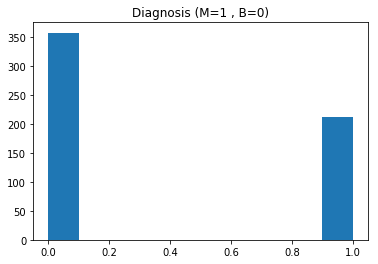

In [37]:
data.describe()
plt.hist(data['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()

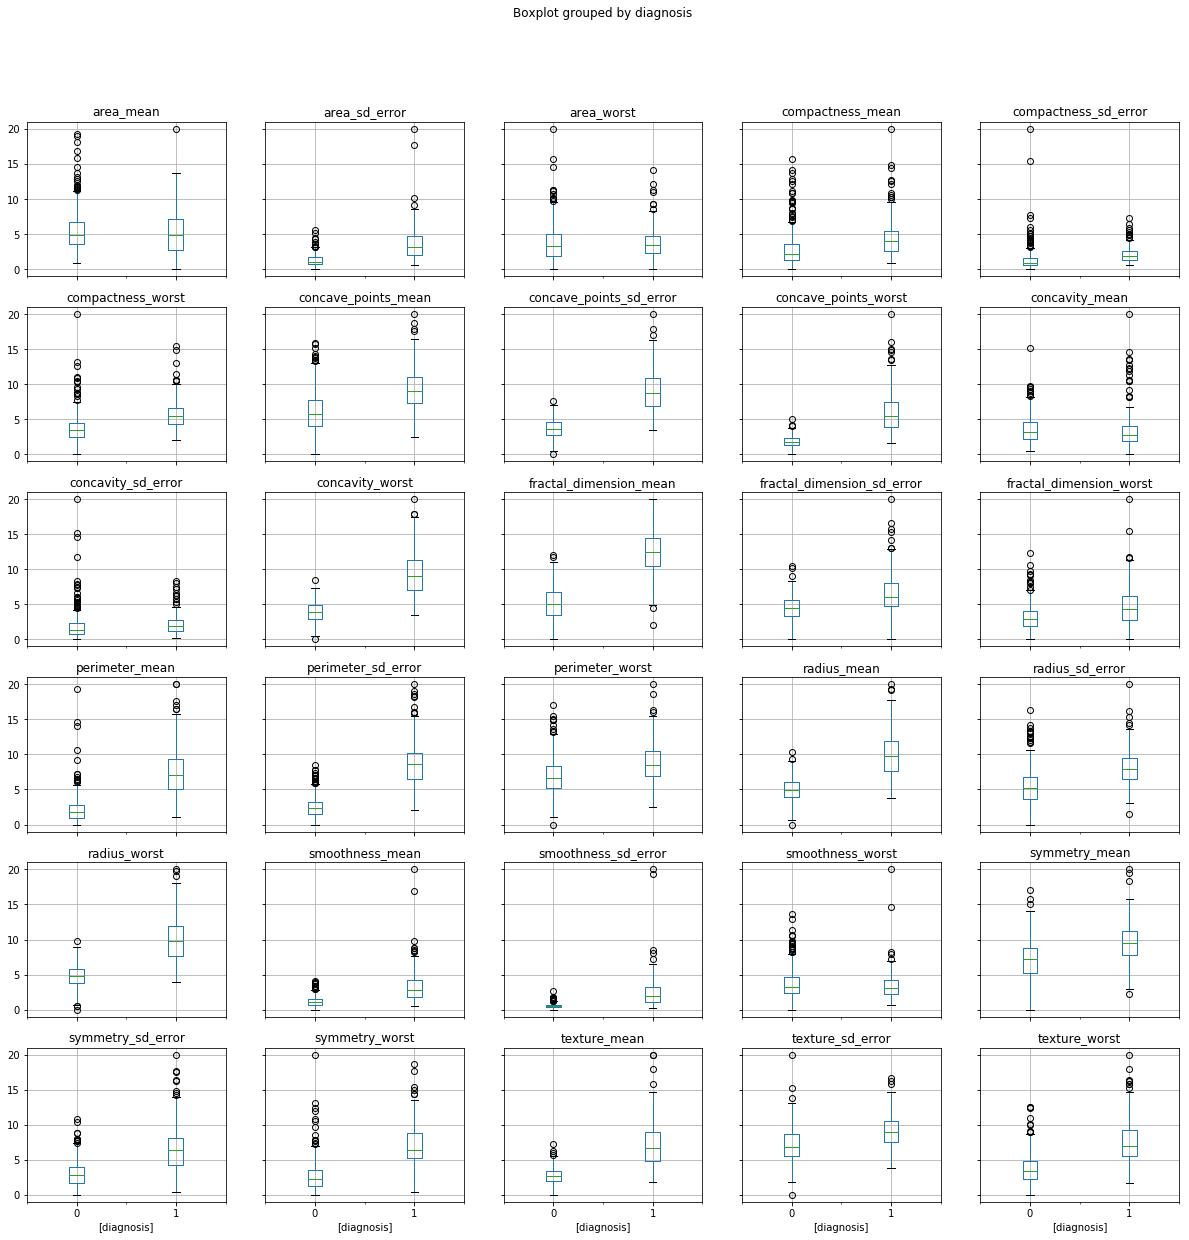

In [39]:
data.boxplot(by = 'diagnosis', figsize = (20, 20))
plt.show()

In [40]:
data.groupby('diagnosis')['diagnosis'].value_counts()

diagnosis  diagnosis
0          0            357
1          1            211
Name: diagnosis, dtype: int64

In [42]:
data_m = data[data['diagnosis'] ==1]

In [44]:
data_b = data[data['diagnosis'] ==0]

In [45]:
data_m.describe()

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,211.0,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,...,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,1.0,9.919383,8.081234,9.887381,7.081817,9.062927,7.679298,7.503018,8.718674,8.755230,...,9.380784,9.251079,9.039838,6.066940,9.719737,6.716846,7.178390,12.497813,6.557082,4.769807
std,0.0,3.039788,2.507976,3.026825,3.128820,2.273658,3.271897,3.494735,3.400816,2.777352,...,3.047815,2.870069,2.925973,2.939279,2.890966,3.290715,2.891988,3.165643,2.927799,2.823171
min,1.0,3.756922,1.474467,3.885011,1.850265,3.806085,1.636096,1.123711,2.018887,2.505051,...,3.493419,2.478678,3.455351,1.587200,2.251866,0.466086,0.383067,1.992440,0.000000,0.000000
25%,1.0,7.656775,6.523504,7.590353,4.763521,7.471337,5.522361,5.124180,6.423459,6.868687,...,6.972608,7.356077,6.856915,3.853716,7.816153,4.213794,5.202077,10.494845,4.719101,2.786961
50%,1.0,9.767618,7.947244,9.731187,6.679958,8.913966,6.902644,7.066542,8.572565,8.444444,...,9.000356,9.061834,8.714577,5.489579,9.539721,6.376381,6.436102,12.508591,6.063473,4.268661
75%,1.0,11.935255,9.516402,11.907954,9.001060,10.520899,9.298203,9.397844,10.183897,10.459596,...,11.262896,11.023454,10.846158,7.458219,11.184045,8.144095,8.859425,14.457045,7.985413,6.225895
max,1.0,20.000000,20.000000,20.000000,20.000000,16.623635,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,18.690096,20.000000,20.000000,20.000000


In [46]:
data_b.describe()

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,357.0,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,0.0,4.889511,5.549382,4.738499,2.708719,7.194664,3.723981,2.158277,2.556402,6.887474,...,3.877482,6.127436,3.645195,1.836902,7.104206,3.015059,2.655555,5.116450,4.484366,3.201111
std,0.0,1.685372,2.702147,1.631876,1.139233,2.427747,2.070422,2.035715,1.581390,2.505733,...,1.409724,2.928547,1.347387,0.804175,2.643263,1.788670,2.242296,2.460301,1.645763,1.810842
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003942,0.022301
25%,0.0,3.879975,3.679405,3.742658,1.991092,5.494267,2.223176,0.951734,1.493042,5.252525,...,2.952686,4.029851,2.775039,1.287357,5.181272,1.643721,1.231310,3.507904,3.315592,1.974288
50%,0.0,4.940130,5.194454,4.752954,2.671474,6.884536,3.429851,1.738051,2.330020,6.606061,...,3.856279,5.756930,3.636635,1.780378,7.162385,2.765278,2.255591,5.107216,4.423418,2.896497
75%,0.0,6.047612,6.797430,5.847557,3.457900,8.679245,4.795411,2.811153,3.231610,8.383838,...,4.887940,7.723881,4.599831,2.383012,8.773691,3.937286,3.539936,6.700344,5.590380,3.983996
max,0.0,10.288229,16.300304,9.786469,7.199152,20.000000,12.546470,19.250234,8.483101,17.000000,...,8.459623,15.863539,7.638827,5.037357,17.094367,10.819920,20.000000,12.027491,10.498719,12.273383


In [47]:
data_b['smoothness_mean'].describe()

count    357.000000
mean       1.171673
std        0.726730
min        0.000000
25%        0.648353
50%        1.030957
75%        1.537012
max        4.109692
Name: smoothness_mean, dtype: float64

In [48]:
data_m['smoothness_mean'].describe()

count    211.000000
mean       3.342332
std        2.410306
min        0.543750
25%        1.827263
50%        2.730057
75%        4.175658
max       20.000000
Name: smoothness_mean, dtype: float64

In [49]:
data_b['compactness_mean'].describe() 

count    357.000000
mean       2.881943
std        2.456141
min        0.000000
25%        1.362093
50%        2.111635
75%        3.550635
max       15.643945
Name: compactness_mean, dtype: float64

In [50]:
data_m['compactness_mean'].describe() 

count    211.000000
mean       4.498714
std        2.763005
min        0.926788
25%        2.608075
50%        3.950191
75%        5.480067
max       20.000000
Name: compactness_mean, dtype: float64

Thus we see there are clear differences on the mean and median smoothness and compactness for benign and malignant tumors. 
This indicates they are good features for differentiating the benign from the malignant cancer


In [51]:
data_b[['diagnosis','compactness_mean']].corr()

,diagnosis,compactness_mean
diagnosis,NaN,NaN
compactness_mean,NaN,1.0


In [52]:
data_b.corr()

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
diagnosis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
radius_mean,NaN,1.000000,-0.037150,0.996769,0.994435,-0.185118,0.060442,0.086757,0.411845,-0.235576,...,0.976980,-0.035321,0.962649,0.970200,-0.296840,0.129418,0.116961,0.427068,-0.146718,-0.309311
radius_sd_error,NaN,-0.037150,1.000000,-0.039923,-0.039055,-0.233814,-0.058695,-0.023084,-0.142535,-0.068707,...,-0.026223,0.918362,-0.026053,-0.027282,-0.176315,-0.012706,-0.010459,-0.106141,-0.085015,-0.057026
radius_worst,NaN,0.996769,-0.039923,1.000000,0.990653,-0.148729,0.135411,0.147612,0.465519,-0.208957,...,0.974688,-0.040252,0.969833,0.966934,-0.269148,0.193168,0.169798,0.475494,-0.129301,-0.254780
texture_mean,NaN,0.994435,-0.039055,0.990653,1.000000,-0.203128,0.052353,0.092317,0.403397,-0.237391,...,0.973614,-0.039160,0.958266,0.977478,-0.307259,0.120378,0.117348,0.413453,-0.152935,-0.307107
texture_sd_error,NaN,-0.185118,-0.233814,-0.148729,-0.203128,1.000000,0.561333,0.224384,0.461492,0.452101,...,-0.171942,-0.211315,-0.147883,-0.195461,0.793292,0.246207,0.119117,0.306450,0.260821,0.360202
texture_worst,NaN,0.060442,-0.058695,0.135411,0.052353,0.561333,1.000000,0.754994,0.750119,0.381422,...,0.073874,-0.083774,0.170031,0.056911,0.424112,0.801046,0.642608,0.660886,0.223872,0.684380
perimeter_mean,NaN,0.086757,-0.023084,0.147612,0.092317,0.224384,0.754994,1.000000,0.711823,0.261618,...,0.092301,-0.036471,0.173324,0.090385,0.160327,0.696326,0.872348,0.673560,0.145111,0.581761
perimeter_sd_error,NaN,0.411845,-0.142535,0.465519,0.403397,0.461492,0.750119,0.711823,1.000000,0.251713,...,0.405639,-0.150195,0.459660,0.387669,0.291241,0.560232,0.541970,0.827355,0.080778,0.327822
perimeter_worst,NaN,-0.235576,-0.068707,-0.208957,-0.237391,0.452101,0.381422,0.261618,0.251713,1.000000,...,-0.224771,-0.097413,-0.196420,-0.234078,0.315122,0.193632,0.157036,0.140151,0.626938,0.271684


In [53]:
data.head(5)

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,1,12.862890,5.451471,12.315666,10.031813,5.797599,3.635360,4.072165,6.975149,7.595960,...,12.138029,6.071429,10.796354,8.704286,6.951066,3.091267,3.859425,12.783505,4.671792,4.457563
1,1,12.029911,7.805208,11.914864,8.988335,10.286179,8.620330,9.250234,12.713718,10.191919,...,11.127713,7.201493,10.168833,7.490169,9.671796,7.707503,7.194888,16.701031,8.074118,4.268661
2,1,4.201808,7.216774,4.670030,2.058112,16.226415,16.227225,11.312090,10.457256,15.525253,...,4.966204,7.718550,4.826934,1.880161,18.309450,16.280234,10.972843,17.697595,20.000000,15.474223
3,1,12.597851,3.131552,12.619722,9.785790,8.607024,6.957855,9.278351,10.367793,7.565657,...,10.394877,2.478678,10.138951,6.831498,8.747276,3.448303,6.389776,11.168385,3.150010,2.851896
4,1,5.176771,4.051403,5.359685,2.830117,13.572267,9.239924,7.394564,8.040755,10.373737,...,5.364639,6.252665,5.278151,2.734959,14.254771,9.655674,8.554313,11.965636,9.540706,9.098780


In [54]:
X = data.iloc[:,1:31]  # all rows, all the features and no labels
y = data.iloc[:, 0]  # all rows, label only

In [55]:
data.shape

(568, 31)

In [56]:
X.shape
X.head()

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,12.862890,5.451471,12.315666,10.031813,5.797599,3.635360,4.072165,6.975149,7.595960,2.826453,...,12.138029,6.071429,10.796354,8.704286,6.951066,3.091267,3.859425,12.783505,4.671792,4.457563
1,12.029911,7.805208,11.914864,8.988335,10.286179,8.620330,9.250234,12.713718,10.191919,4.224937,...,11.127713,7.201493,10.168833,7.490169,9.671796,7.707503,7.194888,16.701031,8.074118,4.268661
2,4.201808,7.216774,4.670030,2.058112,16.226415,16.227225,11.312090,10.457256,15.525253,20.000000,...,4.966204,7.718550,4.826934,1.880161,18.309450,16.280234,10.972843,17.697595,20.000000,15.474223
3,12.597851,3.131552,12.619722,9.785790,8.607024,6.957855,9.278351,10.367793,7.565657,3.736310,...,10.394877,2.478678,10.138951,6.831498,8.747276,3.448303,6.389776,11.168385,3.150010,2.851896
4,5.176771,4.051403,5.359685,2.830117,13.572267,9.239924,7.394564,8.040755,10.373737,11.023589,...,5.364639,6.252665,5.278151,2.734959,14.254771,9.655674,8.554313,11.965636,9.540706,9.098780


In [57]:
y.shape
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [58]:
X.describe()

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,6.758002,6.489912,6.651199,4.333232,7.888684,5.193298,4.143735,4.845556,7.581306,5.395786,...,5.921843,7.287803,5.649191,3.408272,8.075820,4.390194,4.335692,7.858470,5.254336,3.783849
std,3.335147,2.900579,3.356485,2.985567,2.536067,3.211780,3.715755,3.838684,2.759537,2.963295,...,3.431035,3.273807,3.334298,2.791222,3.013687,3.037191,3.322501,4.500636,2.424924,2.363555
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.464480,4.374366,4.332113,2.347190,6.077458,2.787252,1.384255,2.018887,5.646465,3.259267,...,3.614372,4.837420,3.355994,1.620994,6.000132,2.320924,1.828674,4.448797,3.699980,2.147776
50%,6.033414,6.185323,5.862760,3.437964,7.806265,4.487148,2.877226,3.325547,7.393939,4.867313,...,5.005336,7.145522,4.705912,2.459448,7.941623,3.581221,3.619010,6.861856,4.949734,3.276269
75%,8.328837,8.178898,8.304195,5.422057,9.509795,6.810625,6.075445,7.329026,9.053030,6.807077,...,7.710779,9.454957,7.447084,4.366398,9.883114,6.021286,6.092652,11.087629,6.354228,4.857012
max,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000


In [59]:
data.corr()

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
diagnosis,1.000000,0.729376,0.422146,0.741887,0.708389,0.356276,0.595587,0.695648,0.776369,0.327336,...,0.775725,0.461443,0.782470,0.732925,0.419731,0.589453,0.658348,0.793181,0.413382,0.320983
radius_mean,0.729376,1.000000,0.329383,0.997876,0.987344,0.168094,0.505129,0.676557,0.823165,0.144236,...,0.969964,0.300440,0.966231,0.941537,0.117392,0.411329,0.525454,0.744025,0.159877,0.003339
radius_sd_error,0.422146,0.329383,1.000000,0.335918,0.326193,-0.017769,0.252038,0.315248,0.305590,0.080146,...,0.361964,0.912020,0.369573,0.353434,0.082714,0.290229,0.311122,0.306278,0.116263,0.127177
radius_worst,0.741887,0.997876,0.335918,1.000000,0.986548,0.204505,0.555676,0.715662,0.851338,0.179100,...,0.969675,0.307013,0.971157,0.941735,0.148059,0.453304,0.562165,0.770783,0.184458,0.046909
texture_mean,0.708389,0.987344,0.326193,0.986548,1.000000,0.174838,0.497981,0.686232,0.824246,0.148219,...,0.963319,0.290565,0.960440,0.959952,0.121543,0.388554,0.511392,0.722009,0.139856,0.000382
texture_sd_error,0.356276,0.168094,-0.017769,0.204505,0.174838,1.000000,0.657741,0.519002,0.551009,0.555259,...,0.209018,0.039977,0.234093,0.202344,0.804667,0.469090,0.431727,0.500119,0.390161,0.496684
texture_worst,0.595587,0.505129,0.252038,0.555676,0.497981,0.657741,1.000000,0.881619,0.829050,0.598095,...,0.531125,0.258877,0.585188,0.504612,0.564204,0.864097,0.815021,0.813810,0.502439,0.684961
perimeter_mean,0.695648,0.676557,0.315248,0.715662,0.686232,0.519002,0.881619,1.000000,0.920462,0.495525,...,0.685826,0.308645,0.726703,0.673187,0.446155,0.751937,0.883184,0.859918,0.401782,0.510736
perimeter_sd_error,0.776369,0.823165,0.305590,0.851338,0.824246,0.551009,0.829050,0.920462,1.000000,0.457171,...,0.829188,0.301004,0.854468,0.808120,0.450145,0.663532,0.750169,0.909272,0.368009,0.363277
perimeter_worst,0.327336,0.144236,0.080146,0.179100,0.148219,0.555259,0.598095,0.495525,0.457171,1.000000,...,0.179703,0.096533,0.212084,0.170721,0.424045,0.467830,0.429023,0.425146,0.696745,0.434165


Bootstrap sampling

In [60]:
np.random.seed(123)

In [61]:
data.iloc[np.random.choice(4, 5)]

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
2,1,4.201808,7.216774,4.670030,2.058112,16.226415,16.227225,11.312090,10.457256,15.525253,...,4.966204,7.718550,4.826934,1.880161,18.309450,16.280234,10.972843,17.697595,20.000000,15.474223
1,1,12.029911,7.805208,11.914864,8.988335,10.286179,8.620330,9.250234,12.713718,10.191919,...,11.127713,7.201493,10.168833,7.490169,9.671796,7.707503,7.194888,16.701031,8.074118,4.268661
2,1,4.201808,7.216774,4.670030,2.058112,16.226415,16.227225,11.312090,10.457256,15.525253,...,4.966204,7.718550,4.826934,1.880161,18.309450,16.280234,10.972843,17.697595,20.000000,15.474223
2,1,4.201808,7.216774,4.670030,2.058112,16.226415,16.227225,11.312090,10.457256,15.525253,...,4.966204,7.718550,4.826934,1.880161,18.309450,16.280234,10.972843,17.697595,20.000000,15.474223
0,1,12.862890,5.451471,12.315666,10.031813,5.797599,3.635360,4.072165,6.975149,7.595960,...,12.138029,6.071429,10.796354,8.704286,6.951066,3.091267,3.859425,12.783505,4.671792,4.457563


In [62]:
#In python, the default sampling is done with replacement. Thus we see the 2 index row appears tree times. 
#This means this sampling is bootstrap. For further analysis with bootstrap, 
#we can reorder the index (index.reset()) like we did above

In [63]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 1.83208378, -0.35832707,  1.68910604, ...,  1.09526221,
        -0.24044363,  0.28529387],
       [ 1.58210603,  0.45385958,  1.56958968, ...,  1.96646779,
         1.16385786,  0.2053006 ],
       [-0.76711673,  0.25081292, -0.59077158, ...,  2.18809026,
         6.08623563,  4.95045676],
       ...,
       [ 0.70434323,  2.04789258,  0.6752776 , ...,  0.41969578,
        -1.10613122, -0.31576665],
       [ 1.84060575,  2.33962629,  1.98583632, ...,  2.30272257,
         1.93516598,  2.22846365],
       [-1.80679694,  1.22170271, -1.81313547, ..., -1.74761915,
        -0.04354852, -0.74961903]])

In [64]:
#Principal Component Analysis¶
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[ 2.41634549e+00, -3.76396914e+00, -5.32825592e-01, ...,
         3.37244478e-02, -7.13872772e-03, -4.60354762e-04],
       [ 5.76839884e+00, -1.05148900e+00, -5.57676570e-01, ...,
         4.75554530e-02,  2.53205144e-03,  1.28187320e-03],
       [ 7.11180138e+00,  1.03352274e+01, -3.22687801e+00, ...,
         4.16275432e-02, -6.84213115e-02, -2.07034454e-02],
       ...,
       [ 1.29772266e+00, -1.88968748e+00,  5.27702504e-01, ...,
        -1.71091291e-03,  5.58779583e-03,  4.93233421e-03],
       [ 1.04294632e+01,  1.73709985e+00, -1.92325588e+00, ...,
        -6.97956265e-02, -8.24677664e-02, -2.51521926e-02],
       [-5.46164617e+00, -6.90050574e-01,  1.48109443e+00, ...,
        -9.96332663e-03, -6.07707972e-02, -1.95846624e-02]])

In [65]:
covariance=pca.get_covariance()
#covariance

In [66]:
explained_variance=pca.explained_variance_
explained_variance

array([1.32655353e+01, 5.72701072e+00, 2.83721999e+00, 1.97059042e+00,
       1.65650369e+00, 1.21330351e+00, 6.72676167e-01, 4.78830111e-01,
       4.19767250e-01, 3.51945381e-01, 2.96037536e-01, 2.61611581e-01,
       2.43390850e-01, 1.57303814e-01, 9.43690165e-02, 7.95469930e-02,
       5.97939848e-02, 5.24215447e-02, 4.99741640e-02, 3.12723955e-02,
       3.02126202e-02, 2.76889285e-02, 2.45449261e-02, 1.82093796e-02,
       1.56356945e-02, 8.20047333e-03, 6.83195923e-03, 1.60287103e-03,
       7.49679708e-04, 1.29082487e-04])

In [67]:
sum(explained_variance)


30.05291005291004

In [68]:
pca.fit_transform(X)

array([[ 2.41634549e+00, -3.76396914e+00, -5.32825592e-01, ...,
         3.37244478e-02, -7.13872772e-03, -4.60354762e-04],
       [ 5.76839884e+00, -1.05148900e+00, -5.57676570e-01, ...,
         4.75554530e-02,  2.53205144e-03,  1.28187320e-03],
       [ 7.11180138e+00,  1.03352274e+01, -3.22687801e+00, ...,
         4.16275432e-02, -6.84213115e-02, -2.07034454e-02],
       ...,
       [ 1.29772266e+00, -1.88968748e+00,  5.27702504e-01, ...,
        -1.71091291e-03,  5.58779583e-03,  4.93233421e-03],
       [ 1.04294632e+01,  1.73709985e+00, -1.92325588e+00, ...,
        -6.97956265e-02, -8.24677664e-02, -2.51521926e-02],
       [-5.46164617e+00, -6.90050574e-01,  1.48109443e+00, ...,
        -9.96332663e-03, -6.07707972e-02, -1.95846624e-02]])

In [69]:
from matplotlib import pyplot as plt

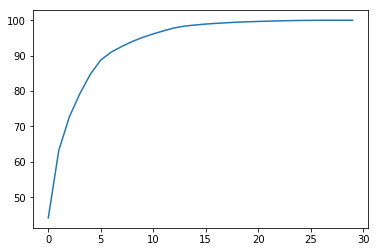

In [70]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

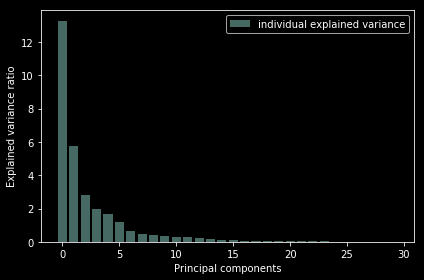

In [71]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    
    plt.bar(range(30), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [72]:
sum(explained_variance[0:7])/sum(explained_variance)


0.9098233671131429

We can see that the second half (15-30) of components has very few amount of variance of the data.The 1st 8 components retains more than 90% of the data. Especially, the first component explains almost 50% and the second explains 18%.

In [73]:
#Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

model_LR= LogisticRegression()

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)


In [75]:
model_LR.fit(X_train,y_train)

C:\Users\aa250124\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [76]:
y_prob = model_LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_LR.score(X_test, y_pred)

1.0

In [77]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[71,  1],
       [ 1, 41]], dtype=int64)

In [78]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9811507936507938

In [79]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9973544973544973

Text(0.5, 0, 'False Positive Rate')

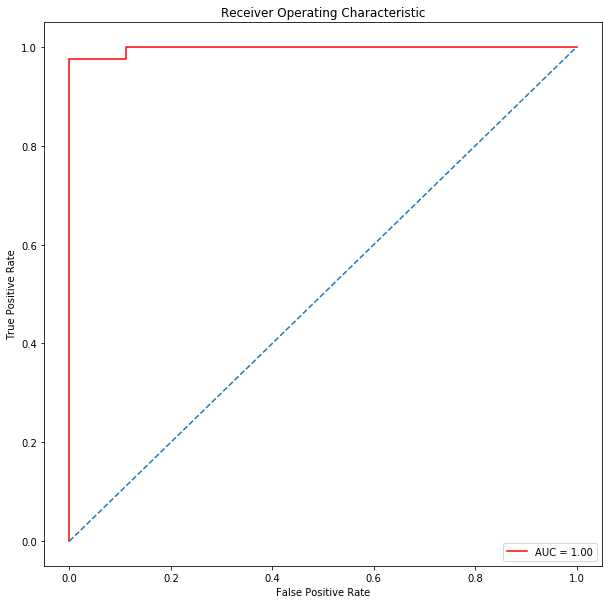

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [81]:
print(model_LR.coef_)

[[ 0.40499781  0.47492975  0.40012024  0.47292809  0.04285096 -0.58375262
   0.85037194  1.0084299  -0.1010449  -0.23263248  1.19093039 -0.1716592
   0.65301877  0.87704761  0.27552433 -0.75697254 -0.26376975  0.35645773
  -0.29285751 -0.47653245  0.9134322   1.23450655  0.70863116  0.89457978
   0.79227722 -0.05601257  1.04318491  0.8066803   0.88523172  0.17428579]]


Easy to see the 3rd and 4th feature ("radius_mean" and "radius_sd_error") play the most important role.



Decision Tree


In [82]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()

In [83]:
model_tree.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [84]:
y_prob = model_tree.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_tree.score(X_test, y_pred)

1.0

In [85]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[66,  6],
       [ 7, 35]], dtype=int64)

In [86]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       0.90      0.92      0.91        72\n           1       0.85      0.83      0.84        42\n\n   micro avg       0.89      0.89      0.89       114\n   macro avg       0.88      0.88      0.88       114\nweighted avg       0.89      0.89      0.89       114\n'

In [87]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.875

In [88]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

Text(0.5, 0, 'False Positive Rate')

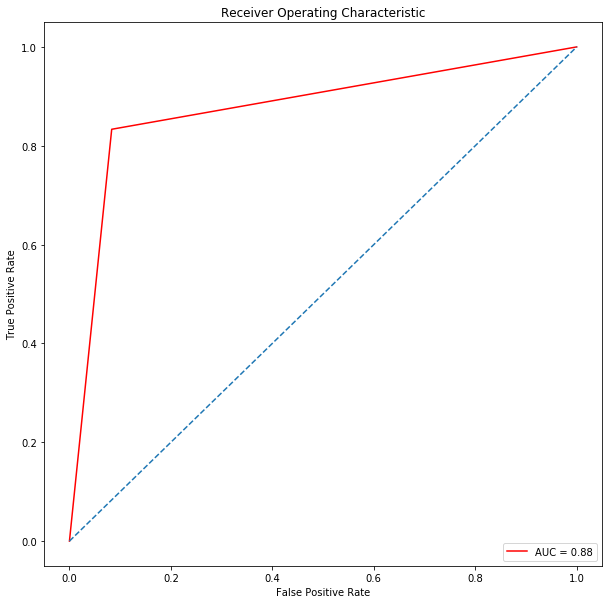

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

(0, 1)

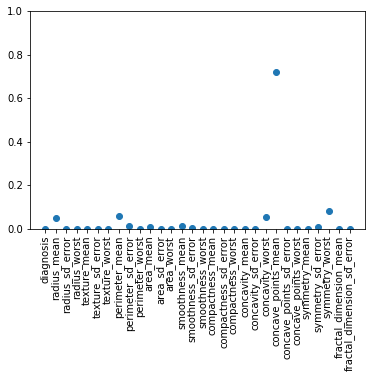

In [90]:
plt.plot(model_tree.feature_importances_, 'o')
plt.xticks(range(30), data.columns , rotation=90)
plt.ylim(0, 1)

In [91]:
#We see for our specific tree, the most important two features are concave_points_mean and symetry_worst.

In [92]:
from sklearn import svm
svm_model = svm.SVC(kernel='linear', C=1, gamma=1)

In [93]:
#Support Vector Machine without polynomial kernel
tuned_parameters = {
 'C': [1, 10, 100,500, 1000], 'kernel': ['linear','rbf'],
 'C': [1, 10, 100,500, 1000], 'gamma': [1,0.1,0.01,0.001, 0.0001], 'kernel': ['rbf'],
 #'degree': [2,3,4,5,6] , 'C':[1,10,100,500,1000] , 'kernel':['poly']
    }

In [94]:
svm_model.fit(X_train, y_train)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [95]:
y_pred= svm_model.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

0.9824561403508771


In [96]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[71,  1],
       [ 1, 41]], dtype=int64)

In [97]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99        72\n           1       0.98      0.98      0.98        42\n\n   micro avg       0.98      0.98      0.98       114\n   macro avg       0.98      0.98      0.98       114\nweighted avg       0.98      0.98      0.98       114\n'

In [98]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9811507936507938

In [99]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9811507936507938

Text(0.5, 0, 'False Positive Rate')

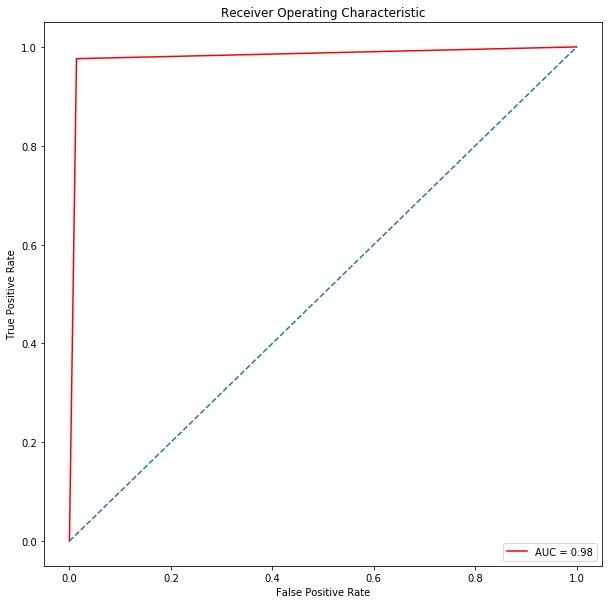

In [100]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [101]:
#Neural Networks

from sklearn.neural_network import MLPClassifier


In [102]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)

C:\Users\aa250124\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [103]:
y_prob = mlp.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
mlp.score(X_test, y_pred)

1.0

In [104]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[71,  1],
       [ 1, 41]], dtype=int64)

In [105]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99        72\n           1       0.98      0.98      0.98        42\n\n   micro avg       0.98      0.98      0.98       114\n   macro avg       0.98      0.98      0.98       114\nweighted avg       0.98      0.98      0.98       114\n'

In [106]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9811507936507938

In [107]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9947089947089947

Text(0.5, 0, 'False Positive Rate')

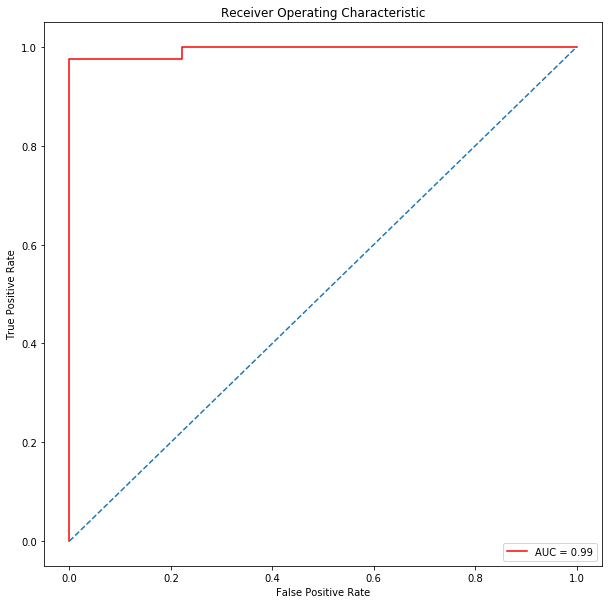

In [108]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Brief summary:
Evaluation:
To Technical Audiences: Explain the limitations of your analysis and identify possible further steps you could take.

To Non-Technical Audiences: Write a short summary of your analysis, explaining how your model works and how it performs. Briefly explain the factors that contributed to malignant vs benign tumor identification.

To Technical Audiences:
#-------------------------------------

In this project, I carried out 6 models: Logistic Regression,Decision trees, and Simple neural network. 
Since this is a simple dataset, all these models achieve great performance: all get the score of 1.0. 
For more complex dataset, we might see better the difference on the behaviors of the different model.

For most cases, I avoid overfitting by using cross-validation. 
For each model, I first implement the default model. 

We see for this specific dataset, default models seem perform already pretty well due to the simplicity of our dataset. Nevertheless, parameter tuning still improves some models quite significantly, like the decision tree model, which is well-known to suffer the overfiting issues.

Since there are a lot (30) columns, to improve the model, I also implement PCA first to reduce dimensionality. And this significantly improves the model ROC.

In the end, it seems the logistic regression (penalized) and neural network both achieve the highest performance on ROC curves (area under curve above 0.99). Since logistic regression is a simple and robust model, we want to pick logistic regression among all the 3 models I carried out.

To Non-Technical Audiences:
#--------------------------------------

In this project, we applied our mmodels to be able to identify which are the most important factors to identify benign/malignant tumors and we came up with very interesting results and high quality models which can predict with a very high quaity the class of tumor based on the features we have in the dataset.

to achieve that, I carried out 3 models: Logistic Regression, Decision trees, and Simple neural network. Since this is a simple dataset, all these models achieve great performance: all get the score of 1.0. For more complex dataset, we might see better the difference on the behaviors of the different model.


Through our analysis we have identified several features which are important on identifying tumor being malignant or benign, such as mean concave points, worst concanve points, and worst perimeter.
#------------------------------